# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from google.colab import drive

## Loading the dataset

In [ ]:
# mounting my drive
drive.mount('/content/drive')

# reading csv file from google drive
customerData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv")

# printing first 10 rows
customerData.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Data Overview

* Observations
* Sanity checks

In [ ]:
# description of data
customerData.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# finding the number of rows and columns
customerData.shape

(5000, 14)

In [ ]:
# printing data info
print(customerData.info())

# checking for null or missing values
print("\nNumber of null values:\n", customerData.isnull().sum())

# checking for inf values
print("\nIs there infinite values?", np.isinf(customerData).any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

Number of null values:
 ID                    0
Ag

Observations:
All attributes have the correct datatype for manipulation later and there are no missing, infinite, or null values present.

In [ ]:
print("Age value counts:\n", customerData['Age'].value_counts())                                                    # printing Age value counts
print("\nExperience value counts:\n", customerData['Experience'].value_counts())                                    # printing Experience value counts
print("\nIncome values less than 0:\n", (customerData['Income'] > 0).value_counts())                                # printing Income value counts greater than 0

# function to check if zipcode has 5 digits
def has_five_digits(number):
    return len(str(number)) == 5
print("\nZIPcode values that have 5 numbers:\n", customerData['ZIPCode'].apply(lambda x: has_five_digits(x)).sum()) # printing ZIPCode results

print("\nFamily value counts:\n", customerData['Family'].value_counts())                                            # printing Family value counts
print("\nCCAvg value counts:\n", (customerData['CCAvg'] >= 0).value_counts())                                       # printing CCAvg value counts greater than 0
print("\nEducation value counts:\n", customerData['Education'].value_counts())                                      # printing Education value counts
print("\nMortgage value counts:\n", (customerData['Mortgage'] >= 0).value_counts())                                 # printing Mortgage value counts greater than 0
print("\nPersonal Loan value counts:\n", customerData['Personal_Loan'].value_counts())                              # printing Personal Loan value counts
print("\nSecurities Account value counts:\n", customerData['Securities_Account'].value_counts())                    # printing Securities Account value counts
print("\nCD Account value counts:\n", customerData['CD_Account'].value_counts())                                    # printing CD Account value counts
print("\nOnline value counts:\n", customerData['Online'].value_counts())                                            # printing Online value counts
print("\nCreditCard value counts:\n", customerData['CreditCard'].value_counts())                                    # printing CreditCard value counts

Age value counts:
 35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64

Experience value counts:
  32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2     

Observations:
All attributes seem to be in the correct range, except for experience which contains negative numbers. It is impossible to have negative professional work experience.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# pairplot to show distributions of attributes
analysisData = customerData.drop('ID', axis=1)
sns.pairplot(analysisData)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# finding the minimum mortgage by filtering out all the 0's and then using the min() function to return the result
print("Minimum Mortgage:", customerData['Mortgage'][customerData['Mortgage'] != 0].min())

Minimum Mortgage: 75


In [ ]:
# printing results of credit card value counts to find the total number of credit card holders
print("Credit Card values:\n", customerData['CreditCard'].value_counts())

Credit Card values:
 0    3530
1    1470
Name: CreditCard, dtype: int64


Observations:
1) Mortgage has a minimum value of 75 when not 0. There is a slope amongst the mortgage and income graph that I assume represents how much income AllLife requires for a mortgage loan. The attribute seems normally distributed through the rest of the attributes.
2) 1470 out of 5000 have credit cards.

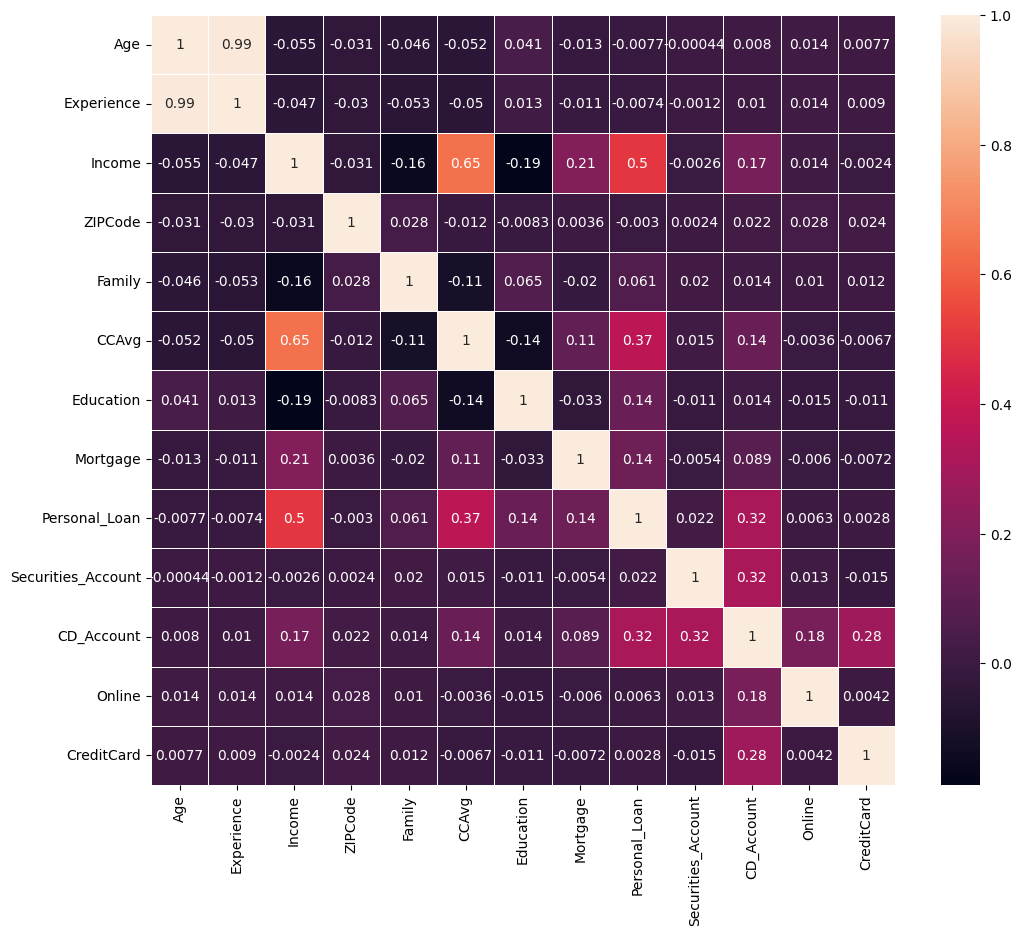

In [ ]:
# creating a correlation matrix
correlation_matrix = analysisData.corr()
# heatmap to show correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.show()

Observations:
Most variables seem to have very little correlation along with several of them having negative values. The top six correlations, repectively, are: 'Age'x'Experience', 'CCAvg'x'Income', 'Personal_Loan'x'Income', 'Personal_Loan'x'CCAvg', 'Personal_Loan'x'CD_Account', and 'Securities_Account'x'CD_Account'. 'Age' and 'Experince' are obviously highly related since as long as someone is working their experience will increase with age. 3) Attributes with the highest correlation with 'Personal_Loan' are 'Income', 'CCAvg', and 'CD_Account'. A noteworthy suprise is the -0.19 correlation between 'Education' and 'Income'.

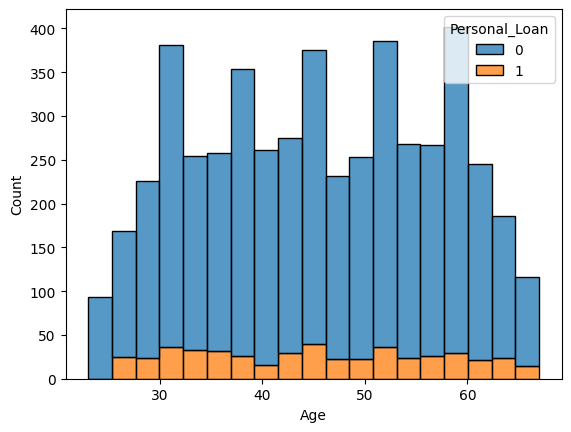

In [ ]:
# histogram showng the distribution of personal loans over age
sns.histplot(data=customerData, x='Age', hue='Personal_Loan', multiple='stack', kde=False)
plt.xlabel('Age')
plt.show()

Observations:
4) Personal loans seem distributed throughout the ages. With small increases around ages 30-35 and 45-55.

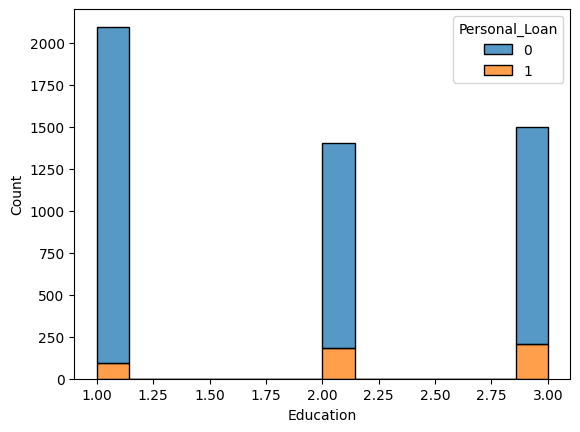

In [ ]:
# histogram to show the distribution of personal loans spread over education ranking
sns.histplot(data=customerData, x='Education', hue='Personal_Loan', multiple='stack', kde=False)
plt.xlabel('Education')
plt.show()

5) The higher education the more personal loans there are.

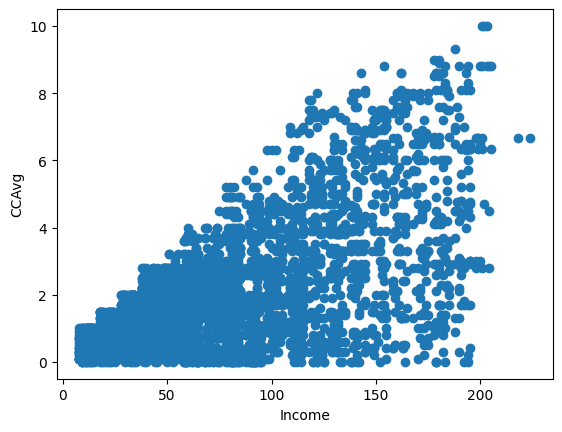

In [ ]:
# scatter plot to show the relationship between 'Income' and 'CCAvg'
plt.scatter(customerData['Income'], customerData['CCAvg'])
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.show()

Observations: 'Income' and 'CCAvg' are obviously correlated and through the scatterplot you can see a rough estimate of credit limits along the slope of points.

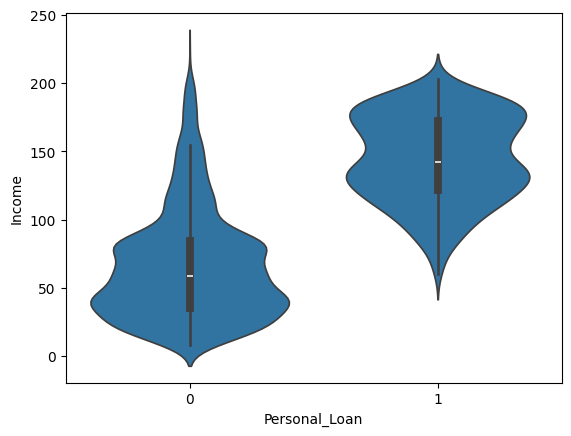

In [ ]:
# creating violin plot to show density of income in respect to people with personal loans
sns.violinplot(data=customerData, x='Personal_Loan', y='Income', orient='v');

Observations: There is strong correlation (.5) with a person's income and their interest in personal loans. There is a large density of people with personal loans that have income falling in the 125-175 thousand dollar range.

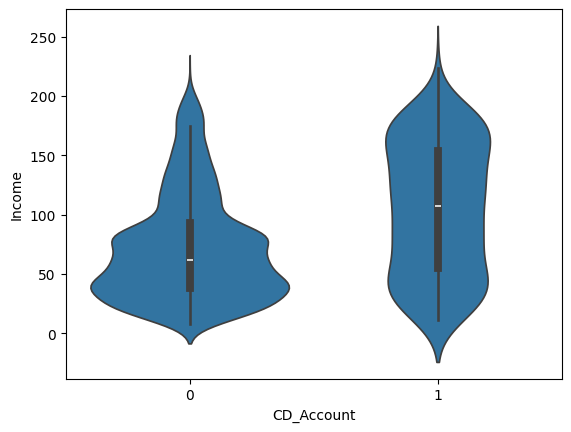

In [ ]:
# creating violin plot to show the density of income with repsect to people with CD accounts
sns.violinplot(data=customerData, x='CD_Account', y='Income', orient='v');

Observations: People holding CD accounts seem equally distributed through the data in terms of income.

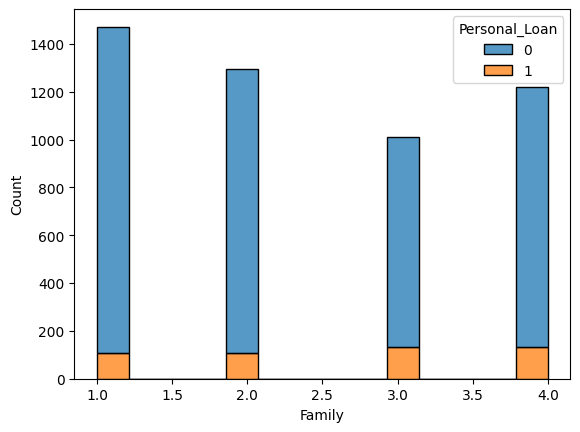

In [ ]:
# histogram to show the distribution of personal loans with different family sizes
sns.histplot(data=customerData, x='Family', hue='Personal_Loan', multiple='stack', kde=False)
plt.xlabel('Family')
plt.show()

Observations: Normal distribution of personal loans through family sizes.

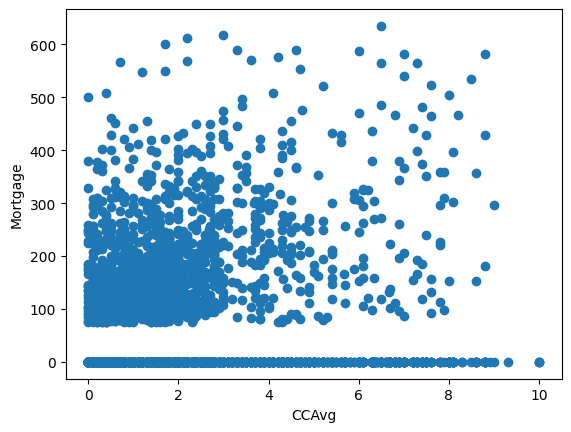

In [ ]:
# scatter plot to show the relationship between 'Mortgage' and 'CCAvg'
plt.scatter(customerData['CCAvg'], customerData['Mortgage'])
plt.xlabel('CCAvg')
plt.ylabel('Mortgage')
plt.show()

Observations: Loose correlation between these two attributes since the more direct correlation is income and CCAvg.

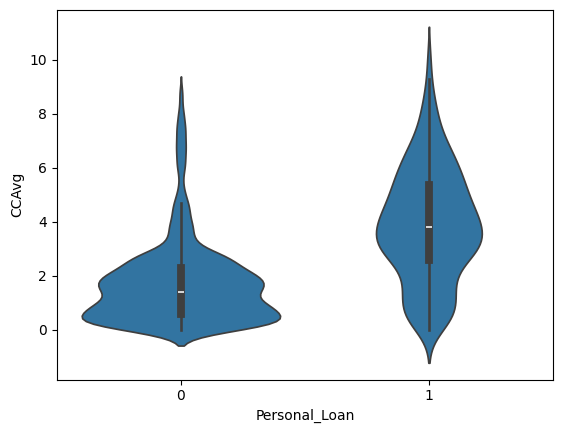

In [ ]:
# violin plot to show density in CCAvg with respect to personal loans
sns.violinplot(data=customerData, x='Personal_Loan', y='CCAvg', orient='v');

Observations: Again, loose correlation with their being an almost normal distribution with people that hold personal loans.

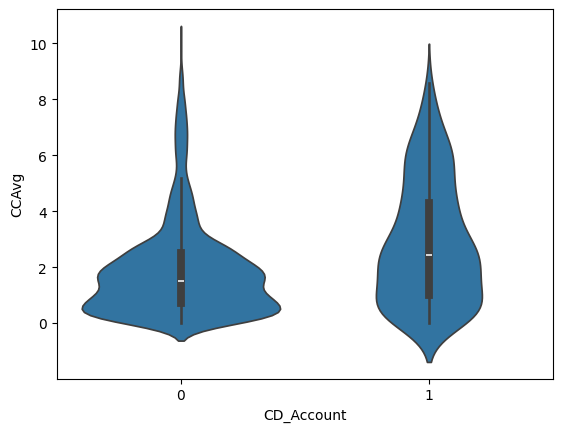

In [ ]:
# violin plot to show density in CCAvg with respect to CD_Accounts
sns.violinplot(data=customerData, x='CD_Account', y='CCAvg', orient='v');

Observations: Again, loose correlation with their being an almost normal distribution with people that hold CD accounts.

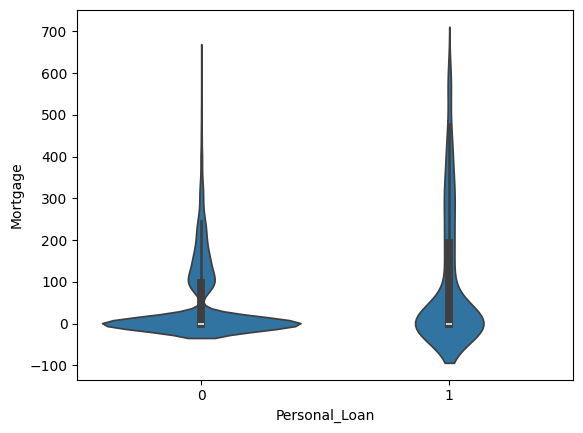

In [ ]:
# violin plot to show density in Mortgage with respect to Personal_Loans
sns.violinplot(data=customerData, x='Personal_Loan', y='Mortgage', orient='v');

Observations: Very little correlation between these two attributes.

In [ ]:
# printing results
print("Value counts for CD_Accounts\n", customerData['CD_Account'].value_counts())

# printing results
print("\nValue counts for Personal_Loans\n", customerData['Personal_Loan'].value_counts())

# filtering the dataset for customers that hold personal loans
onlyPersonalLoans = customerData[customerData['Personal_Loan'] == 1]
# printing percentages
print("\nPercentage of people with personal loans that also have a CD account:", '%.2f'%((onlyPersonalLoans['CD_Account']).mean() * 100))
print("Percentage of people with personal loans that also have a securities account:", onlyPersonalLoans['Securities_Account'].mean() * 100)

# filtering the dataset for customers that hold CD accounts
onlyCDAccounts = customerData[customerData['CD_Account'] == 1]
# printing percentages
print("\nPercentage of people with CD accounts that also have a personal loan:", '%.2f'%((onlyCDAccounts['Personal_Loan']).mean() * 100))
print("Percentage of people with CD accounts that also have a securities account:", '%.2f'%(onlyCDAccounts['Securities_Account'].mean() * 100))

# filtering the dataset for customers that hold security accounts
onlySecurityAccounts = customerData[customerData['Securities_Account'] == 1]
# printing percentages
print("\nPercentage of people with securities accounts that also have a personal loan:", '%.2f'%((onlySecurityAccounts['Personal_Loan']).mean() * 100))
print("Percentage of people with securities accounts that also have a CD account:", '%.2f'%(onlySecurityAccounts['CD_Account'].mean() * 100))

# printing results
print("\nPercentage of people with all three accounts:", '%.2f'%((customerData['Personal_Loan'] & customerData['CD_Account'] & customerData['Securities_Account']).mean() * 100))

Value counts for CD_Accounts
 0    4698
1     302
Name: CD_Account, dtype: int64

Value counts for Personal_Loans
 0    4520
1     480
Name: Personal_Loan, dtype: int64

Percentage of people with personal loans that also have a CD account: 29.17
Percentage of people with personal loans that also have a securities account: 12.5

Percentage of people with CD accounts that also have a personal loan: 46.36
Percentage of people with CD accounts that also have a securities account: 48.68

Percentage of people with securities accounts that also have a personal loan: 11.49
Percentage of people with securities accounts that also have a CD account: 28.16

Percentage of people with all three accounts: 1.02


Observations: There is a strong correlation (nearly 50%) with customers having CD accounts and having other accounts with the bank.

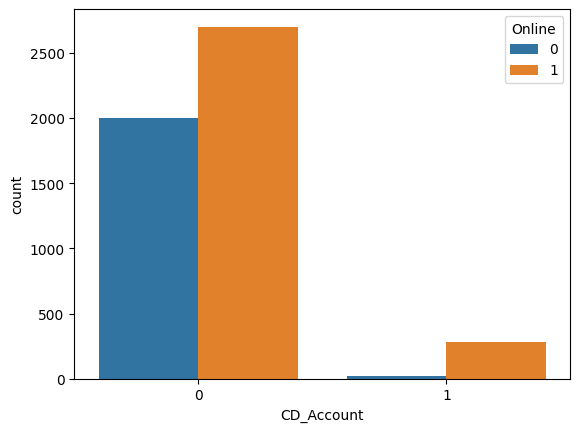

In [ ]:
# countplot to show CD account holders that use online services
sns.countplot(data=customerData, x='CD_Account', hue='Online')
plt.show()

Observations: Not the strongest correlation with people with CD accounts using online services.

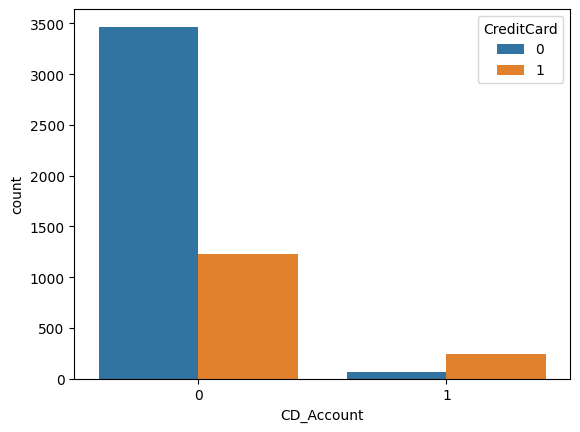

In [ ]:
# countplot to show CD account holders that have a credit card
sns.countplot(data=customerData, x='CD_Account', hue='CreditCard')
plt.show()

Observations: Not the strongest correlation with people with CD accounts having credit cards.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# replacing negative numbers with 0 in the Experience column
customerData['Experience'] = customerData['Experience'].replace(to_replace= {-1, -2, -3}, value=0)

# checking to make sure no more negative numbers exist
print("\nExperience value counts:\n", customerData['Experience'].value_counts())


Experience value counts:
 32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
17    125
27    125
34    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
0     118
33    117
13    117
11    116
37    116
36    114
4     113
21    113
31    104
12    102
38     88
2      85
39     85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64


In [ ]:
# creating a dataset without the unique ID column
df = customerData.drop(['ID'], axis=1)

## Model Building

### Model Evaluation Criterion

*   Predicting a person will not invest in a personal loan but will (FP)
*   Predicting a person will invest in a personal loan and does (TP)

It is important to maximize the true positives and reduce false/positive negatives since the marketing department is trying to allocate resources to better target customers interested in personal loans. Therefore, we want a high precision rate.






### Model Building

In [ ]:
# isolating the target attribute
x = df.drop(['Personal_Loan'], axis=1)
y = df['Personal_Loan']

# splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# ensuring that the train and test sets are the correct size
print("Shape of training set :", x_train.shape)
print("Shape of test set : ", x_test.shape)

# ensuring that the percentage of personal loans in the train and train are equal
print("Percentage of no personal loans in training set:\n", y_train.value_counts(normalize=True))
print("Percentage of personal loans in test set:\n", y_test.value_counts(normalize=True))

Shape of training set : (3500, 12)
Shape of test set :  (1500, 12)
Percentage of no personal loans in training set:
 0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of personal loans in test set:
 0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


In [ ]:
# building the first model
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance Improvement

In [ ]:
def model_perf(model, predictors, target):
  # predicting using the independent variables
  pred = model.predict(predictors)

  # calculating accuracy
  accuracy = accuracy_score(target, pred)
  # calculating recall
  recall = recall_score(target, pred)
  # calculating precision
  precision = precision_score(target, pred)
  # calculating f1
  f1 = f1_score(target, pred)

  print("Accuracy:", "{:.2f}".format(accuracy * 100), "\nRecall:", "{:.2f}".format(recall), "\nPrecision:", "{:.2f}".format(precision), "\nF1:", "{:.2f}".format(f1))


In [ ]:
def conf_matrix(model, predictors, target):

  # predicting using the independent variables
  pred = model.predict(predictors)

  # creating the confusion matrix
  cm = confusion_matrix(target, pred)

  # finding the percentage of each element in the 2 rows
  cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100

  # creating labels to format and display the counts and percentages on the confusion matrix
  annot_labels = [[f"{count}\n({percent:.2f}%)" for count, percent in zip(row, row_percent)]
                for row, row_percent in zip(cm, cm_percent)]


  # plotting the confusion matrix
  sns.heatmap(cm, annot=annot_labels, fmt="", cmap="Blues", cbar=False)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [ ]:
# printing performance metrics for the training set
model_perf(model0, x_train, y_train)

Accuracy: 100.00 
Recall: 1.00 
Precision: 1.00 
F1: 1.00


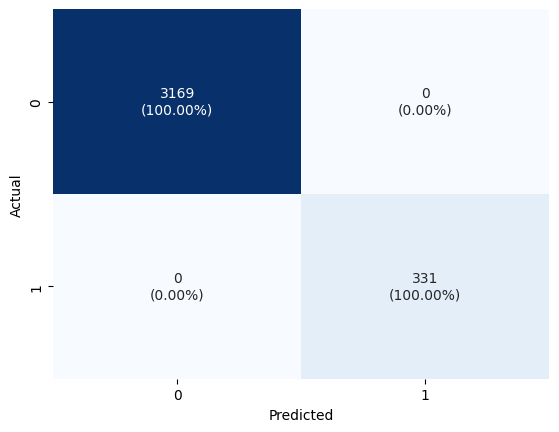

In [ ]:
# displaying confusion matrix for the training set
conf_matrix(model0, x_train, y_train)

In [ ]:
# printing performance metrics for the testing set
model_perf(model0, x_test, y_test)

Accuracy: 98.00 
Recall: 0.89 
Precision: 0.91 
F1: 0.90


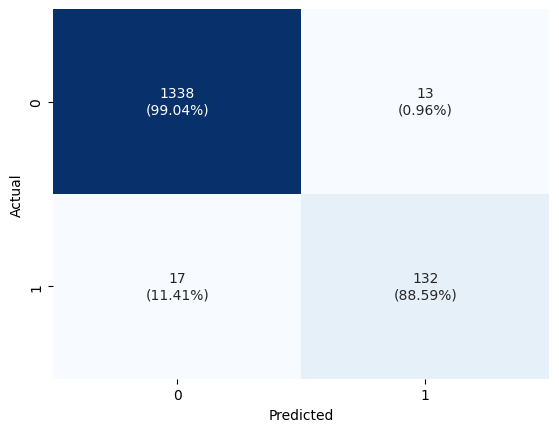

In [ ]:
# displaying confusion matrix for the testing set
conf_matrix(model0, x_test, y_test)

The model performs perfectly with the training set and poorly with the testing set. The model is overfitting and needs pruning.

## Model Comparison and Final Model Selection

In [ ]:
# choosing the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# creating possible parameters for the grid search and cross validation
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": [None, 10, 20],
    "max_leaf_nodes": [5, 7, 9, 11, 13],
    "min_samples_split": [10, 20, 25, 30, 35, 40, 50],
    "min_samples_leaf": [1, 2, 4]
}

# creating the grid search with cross validation
grid_search = GridSearchCV(estimator, parameters, cv=5, scoring='accuracy')

# fitting grid to data
grid_search.fit(x_train, y_train)

# printing best hyperparameters
print("Best parameters:", grid_search.best_params_)
pre_pruned_model = grid_search.best_estimator_

pre_pruned_model.fit(x_train, y_train)

Best parameters: {'class_weight': None, 'max_depth': None, 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 30}


DecisionTreeClassifier(max_leaf_nodes=9, min_samples_split=30, random_state=1)

In [ ]:
# printing performance metrics for the model produced by grid search on the training set
model_perf(pre_pruned_model, x_train, y_train)

Accuracy: 98.97 
Recall: 0.93 
Precision: 0.96 
F1: 0.94


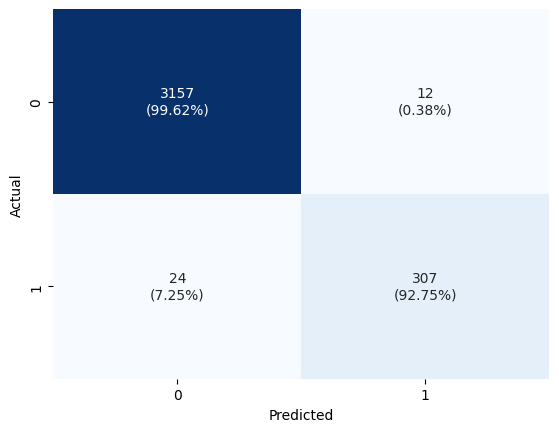

In [ ]:
# displaying confusion matrix for the model produced by grid search on the training set
conf_matrix(pre_pruned_model, x_train, y_train)

In [ ]:
# printing performance metrics for the first model
print("First model:")
model_perf(model0, x_test, y_test)
# printing performance metrics for the model produced by grid search on the testing set
print("\nPre-pruned model:")
model_perf(pre_pruned_model, x_test, y_test)

First model:
Accuracy: 98.00 
Recall: 0.89 
Precision: 0.91 
F1: 0.90

Pre-pruned model:
Accuracy: 98.13 
Recall: 0.88 
Precision: 0.93 
F1: 0.90


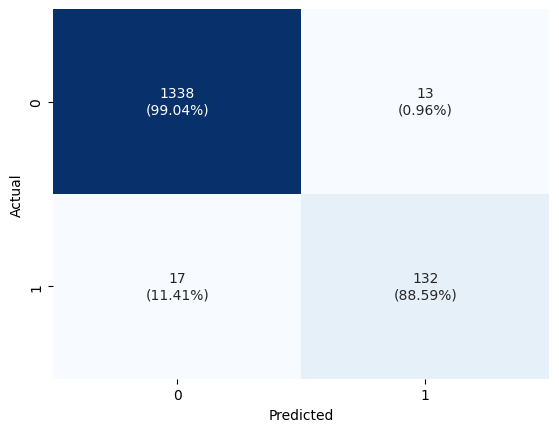

In [ ]:
# displaying confusion matrix for the testing set
conf_matrix(model0, x_test, y_test)

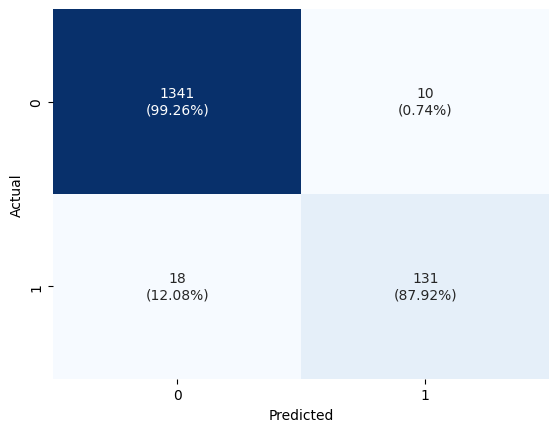

In [ ]:
# displaying confusion matrix for the model produced by grid search on the testing set
conf_matrix(pre_pruned_model, x_test, y_test)

Changes from first model are nominal considering precision specifically and require further tuning.

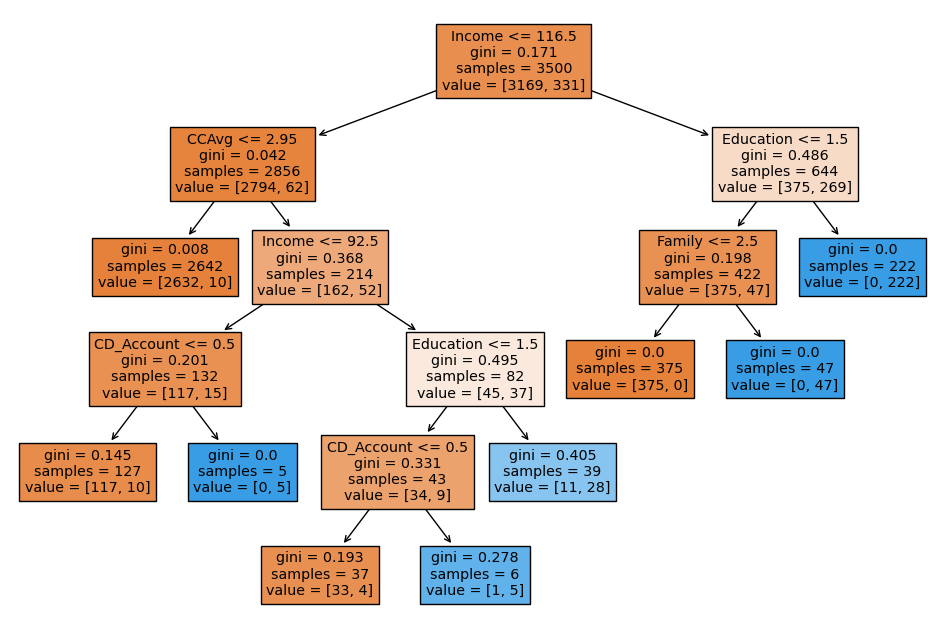

In [ ]:
# displaying pre-pruned decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(pre_pruned_model, filled=True, feature_names=x_train.columns, class_names=None, node_ids=False)
plt.show()

The right side of the model that follows people with income greater than 116.5 with each node having generally low gini values.

In [ ]:
# printing tree in text format
print(tree.export_text(pre_pruned_model, feature_names=list(x_train.columns), show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



In [ ]:
# finding the most important features in the tree
feature_importances = pre_pruned_model.feature_importances_

# printing results
print("Feature importances:")
for feature_name, importance in zip(x_train.columns, feature_importances):
    print(feature_name, ":", "{:.2f}".format(importance))

Feature importances:
Age : 0.00
Experience : 0.00
Income : 0.33
ZIPCode : 0.00
Family : 0.16
CCAvg : 0.04
Education : 0.45
Mortgage : 0.00
Securities_Account : 0.00
CD_Account : 0.03
Online : 0.00
CreditCard : 0.00


Education, Income, and Family are big deciding factors in this decision tree.

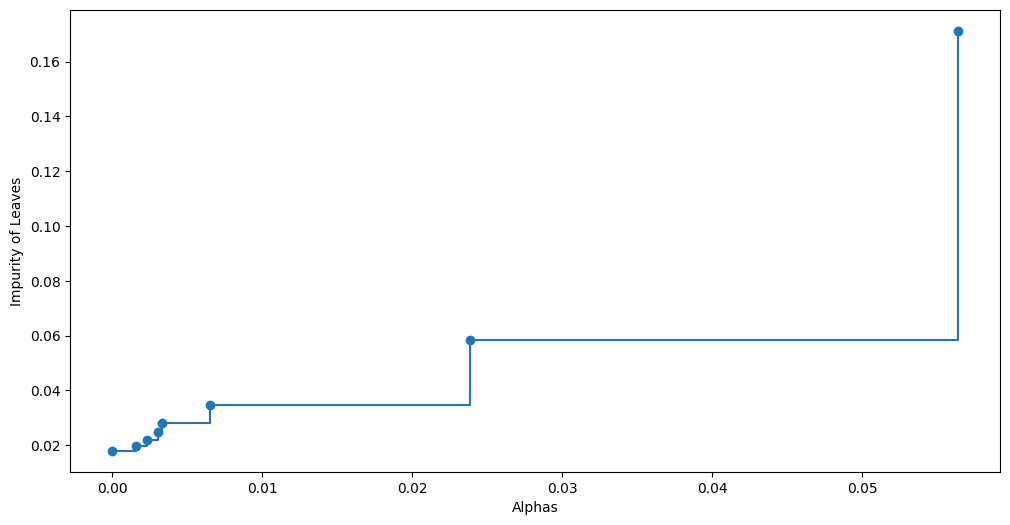

In [ ]:
# finding the effective alphas and total impurity of the training set
alphas, impurities = pre_pruned_model.cost_complexity_pruning_path(x_train, y_train).values()

# creating a subplot with the following plotting commands
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Alphas")
plt.ylabel("Impurity of Leaves")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


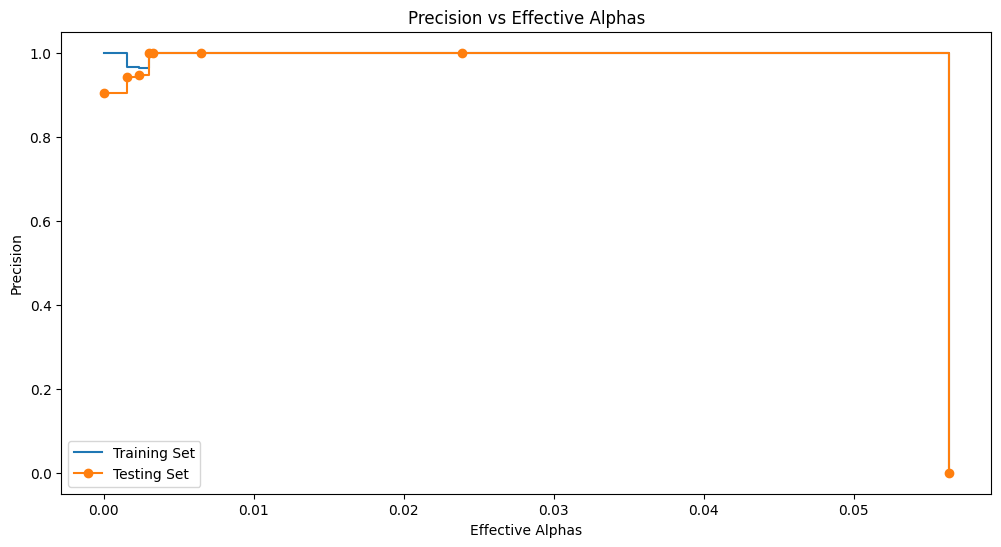

In [ ]:
# plotting precision versus effective effective alphas in the training and testing set
# lists to hold precision data
train_precision = []
test_precision = []

# calculating precision for each alpha in training and testing data sets
for alpha in alphas:
  # creating a pruned tree with different alpha
  next_pruned_tree = DecisionTreeClassifier(ccp_alpha=alpha)
  next_pruned_tree.fit(x_train, y_train)

  # creating predictions and finding the precision on training set
  y_train_pred = next_pruned_tree.predict(x_train)
  train_precision.append(precision_score(y_train, y_train_pred))

  # doing same for testing set
  y_test_pred = next_pruned_tree.predict(x_test)
  test_precision.append(precision_score(y_test, y_test_pred))

# plotting graph with step-posts and markers to visualize the precision versus the alphas
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(alphas, train_precision, label='Training Set', drawstyle='steps-post')
plt.plot(alphas, test_precision, marker="o", label='Testing Set', drawstyle='steps-post')
plt.xlabel("Effective Alphas")
plt.ylabel("Precision")
plt.title("Precision vs Effective Alphas")
plt.legend()
plt.show()


In [ ]:
# choosing the model with highest precision scores
best_alpha_index = np.argmax(test_precision)
best_alpha = alphas[best_alpha_index]

# fitting model to tree
post_pruned_model = DecisionTreeClassifier(ccp_alpha = best_alpha)
post_pruned_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003023521760901227)

In [ ]:
# training data performance
model_perf(post_pruned_model, x_train, y_train)

Accuracy: 98.23 
Recall: 0.81 
Precision: 1.00 
F1: 0.90


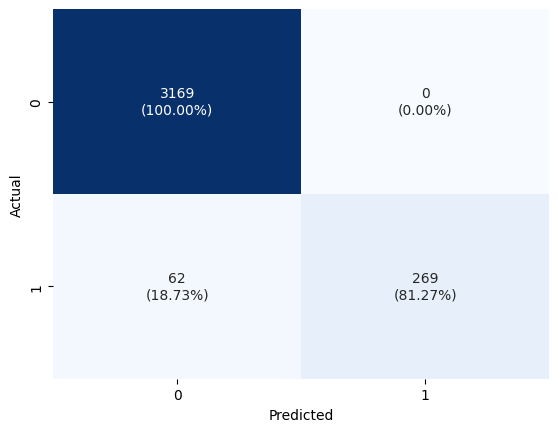

In [ ]:
# confusion matrix for post_pruned tree with the training set
conf_matrix(post_pruned_model, x_train, y_train)

In [ ]:
# printing performance metrics for the pre_pruned model
print("Pre-pruned model:")
model_perf(pre_pruned_model, x_test, y_test)
# printing performance metrics for the post_pruned model produced by grid search on the testing set
print("\nPost-pruned model:")
model_perf(post_pruned_model, x_test, y_test)

Pre-pruned model:
Accuracy: 98.13 
Recall: 0.88 
Precision: 0.93 
F1: 0.90

Post-pruned model:
Accuracy: 97.53 
Recall: 0.75 
Precision: 1.00 
F1: 0.86


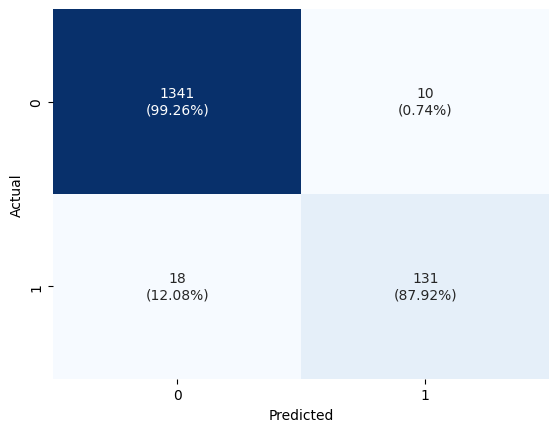

In [ ]:
# pre_pruned confusion matrix
conf_matrix(pre_pruned_model, x_test, y_test)

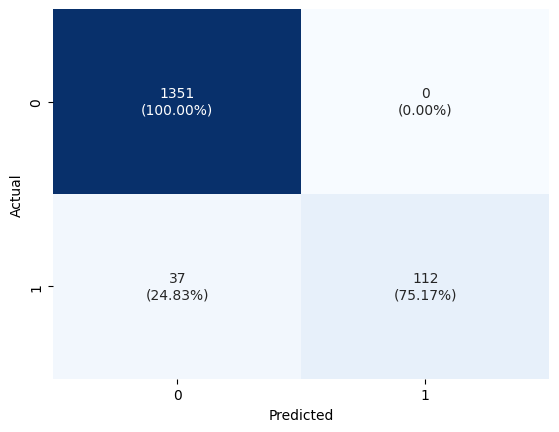

In [ ]:
# post_pruned confusion matrix
conf_matrix(post_pruned_model, x_test, y_test)

The post-pruned model can now eliminate all customers that are not interested in purchasing personal loans and predict 75.17% of the time if someone is going to purchase a loan.

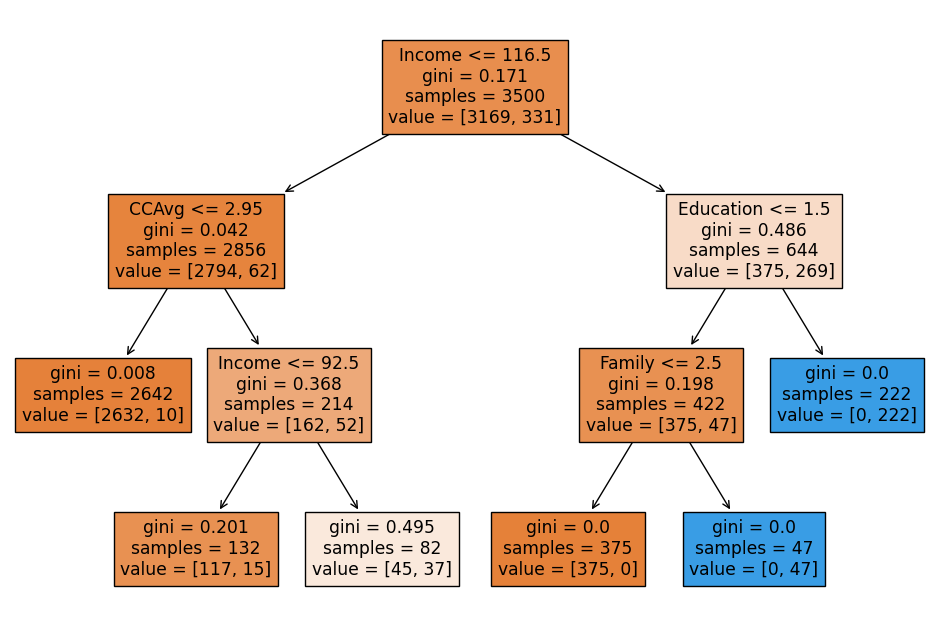

In [ ]:
# displaying post-pruned decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(post_pruned_model, filled=True, feature_names=x_train.columns, class_names=None, node_ids=False)
plt.show()

Decisions using CD_Account have been completely removed with post-pruning.

In [ ]:
# printing tree in text format
print(tree.export_text(post_pruned_model, feature_names=list(x_train.columns), show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



## Actionable Insights and Business Recommendations


The predict precentages and contigencies will aid the marketing team in evaluating customers for a better allocation of time and resources:

* The model is able to correctly predict that a customer is going to buy a personal loan based on three stipulations: their income must be greater than 116,500 dollars if their education ranking is 2 (graduate) or higher then they will buy a loan, and if their education is lower than a 2 but their family size is greater than 2, then they will purchase a loan. These stipulations work 100% of the time since the gini purity for these nodes are 0.
*   The model is able to correctly predict 100% of the time that a customer will not buy a loan if their income is greater than 116,500 dollars and their family size is less than 3.
*   For customers that have income less than or equal to 116,500 dollars the model attempts to correctly predict if they will purchase a loan using their CCAvg or smaller metrics of their income. If the customers CCAvg is less than or equal to 2,950 dollars then the model will correctly predict that they will not buy a loan 99.2% of the time. Now, if their income is less than or equal to 92,500 dollars then the model will correctly predict that they will not buy a loan 80% of the time. And if their income falls within the range of [92,500, 116,500) then the model will correctly predict that they will not buy a loan only 50.5% of the time.
*   Therefore, it is important to take these 4 statistics with their metrics and stipulations of a customer into heavy consideration when marketing personal loans.









___